<a href="https://colab.research.google.com/github/hereiskunalverma/Keras-Datasets/blob/master/BostonHousingPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's Keep it Simple
# We are going to implement Boston Housing Prediction Model
# Take a look at the dataset

In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import matplotlib.pyplot as plt


In [13]:
# importing the dataset from keras datasets api
# feel free to explore it at - tensorflow hub datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

In [14]:

print('the training and test sets consists of following shape --> \n')
print('X_train.shape  --> ', X_train.shape)
print('X_test.shape   --> ', X_test.shape)
print('y_train.shape  --> ',y_train.shape)
print('y_test.shape   --> ', y_test.shape)

the training and test sets consists of following shape --> 

X_train.shape  -->  (404, 13)
X_test.shape   -->  (102, 13)
y_train.shape  -->  (404,)
y_test.shape   -->  (102,)



# Feel free to modify to make it more robust

In [15]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
fs = StandardScaler()
X_train = fs.fit_transform(X_train)
X_test = fs.transform(X_test)

In [16]:
# Creating the model
# Initializing the sequential
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='normal', input_dim=13),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='normal'),
    tf.keras.layers.Dense(units=1, kernel_initializer='uniform'),
    
    ])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# fitting the model
history = model.fit(X_train, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
13/13 [==============================] - 0s 2ms/step - loss: 6.1186
Epoch 2502/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.1750
Epoch 2503/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.0689
Epoch 2504/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.0799
Epoch 2505/5000
13/13 [==============================] - 0s 3ms/step - loss: 6.0942
Epoch 2506/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.1781
Epoch 2507/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.1815
Epoch 2508/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.1124
Epoch 2509/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.1360
Epoch 2510/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.0986
Epoch 2511/5000
13/13 [==============================] - 0s 2ms/step - loss: 6.0693
Epoch 2512/5000
13/13 [==================

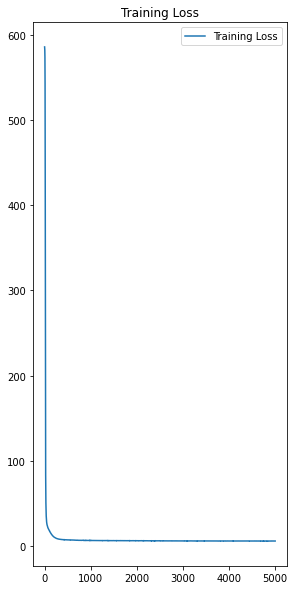

In [18]:

EPOCHS = 5000 # obtained from early stopping i.e., epoch when training stop

loss = history.history['loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(10,10))
#plt.subplot(1,2,1)

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test, model.predict(X_test))
print(f"R2_Score : {score}")

0.7701050557817996

# Using Random Forest Regressor


In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=600, criterion='mae', random_state=42)
regressor.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [23]:
print(f"R2_Score : {r2_score(y_test,regressor.predict(X_test)) * 100}")


R2_Score : 83.14669695447182
